In [1]:
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)

Warning message:
“package ‘survival’ was built under R version 4.0.5”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”


In [2]:
dir_fig = 'R_clogit/for_publish_v2/'

In [3]:
### clean features
fts = c('LOF_FDR_ASD_cds',
        'PLIp9_LOF_DEV_BR_10_cds',
        'LOF_DEV_BR_10_cds',
        'LOF_PLIp9_cds', 
        'LOF_LOWPLI_cds',
        'FDR_ASD_cds', 
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        #'EV_CONS_EL_FRAC_10_cds',
        'S_HET_10_cds',
        'FDR_ASD_utr',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        #'EV_CONS_EL_FRAC_10_utr',
        'S_HET_10_utr',
        'FDR_ASD_intron', 
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        #'EV_CONS_EL_FRAC_10_ncd',
        'S_HET_10_intron',
        'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
fts_labels = c('LOF ASD FDR, CDS',
               'LOF dev. brain pLI≥.9 genes, CDS', 
               'LOF dev. brain genes, CDS', 
               'LOF pLI≥.9, CDS', 
               'LOF pLI≤.9, CDS',
               'ASD FDR, CDS', 
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               #'Evol. Consv. frc≥.1, CDS',
               'S het≥0.01, CDS',
               'ASD FDR, UTR',
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               #'Evol. Consv. frc≥.1, UTR',
               'S het≥0.01, UTR',
               'ASD FDR, intron',
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               #'Evol. Consv. frc≥.1, non-CD',
               'S het≥0.01, intron',
               'Gnocchi≥3', 'Gnocchi≥2')

trs_fts = c('FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_MAX_4', 'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
trs_fts_labels = c('ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

In [4]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

[1]  243 1611
[1] "no extra covariates......................."


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”


[1] "with LOF-SNV and PRS covariates......................."


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”
Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”


[1] "R_clogit/for_publish_v2/devBrainPLI_SQ70.png"
[1] "R_clogit/for_publish_v2/devBrain_SQ70.png"


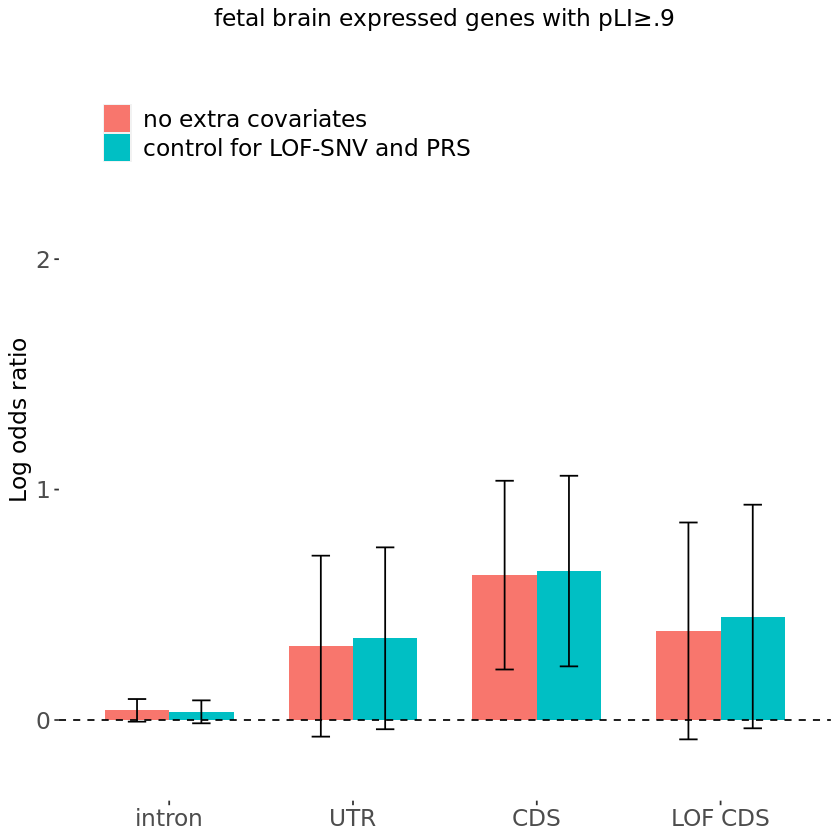

[1] "R_clogit/for_publish_v2/PLI_SQ70.png"


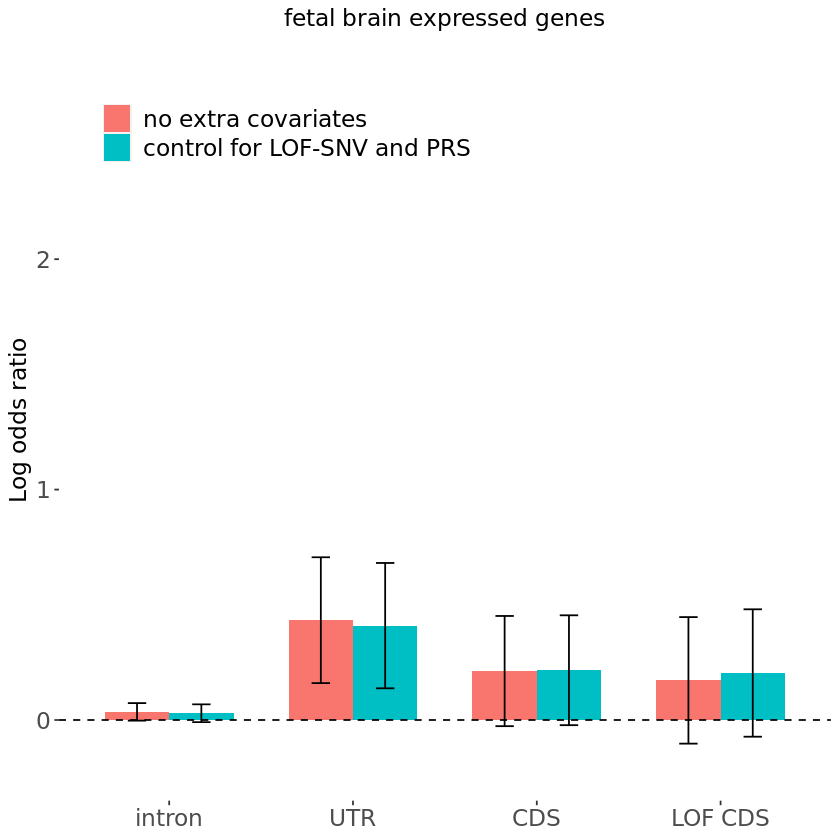

[1] "R_clogit/for_publish_v2/LOWPLI_SQ70.png"


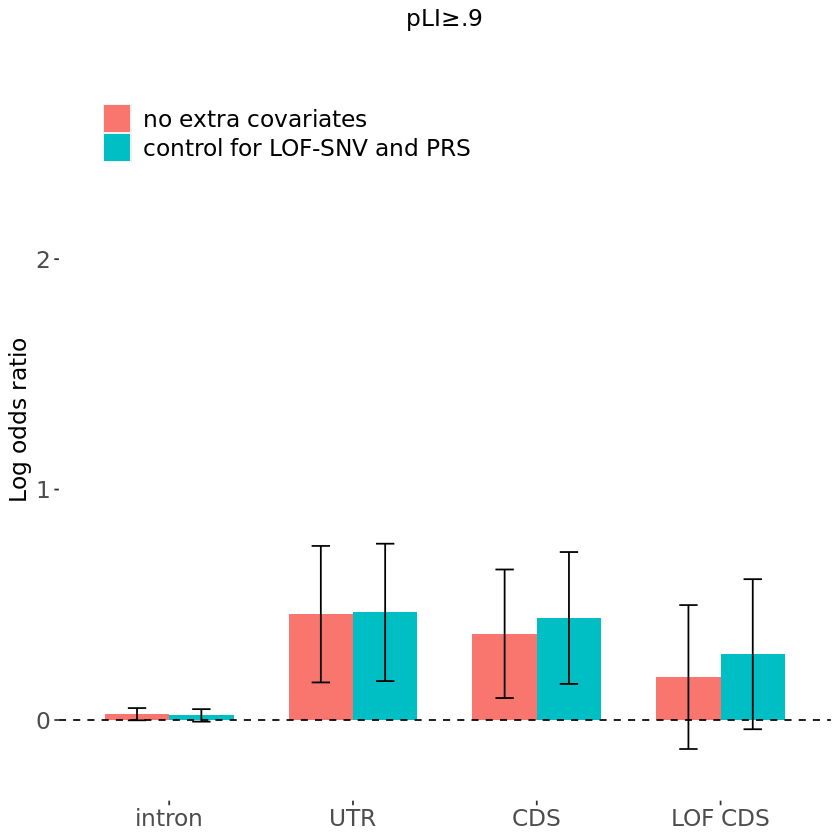

[1] "R_clogit/for_publish_v2/FDR_ASD_SQ70.png"


Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”


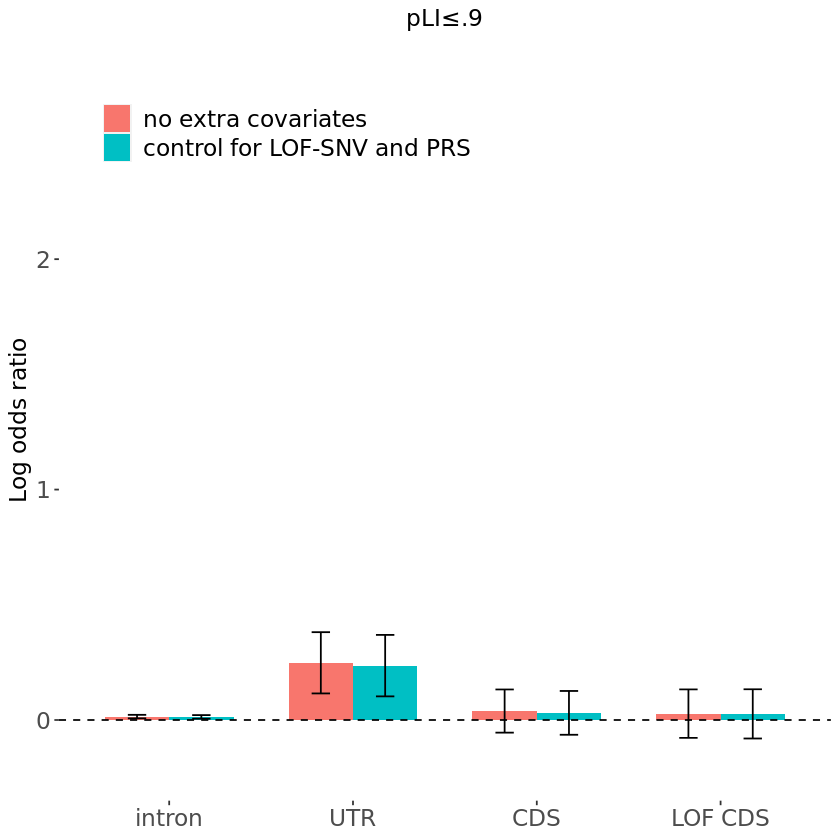

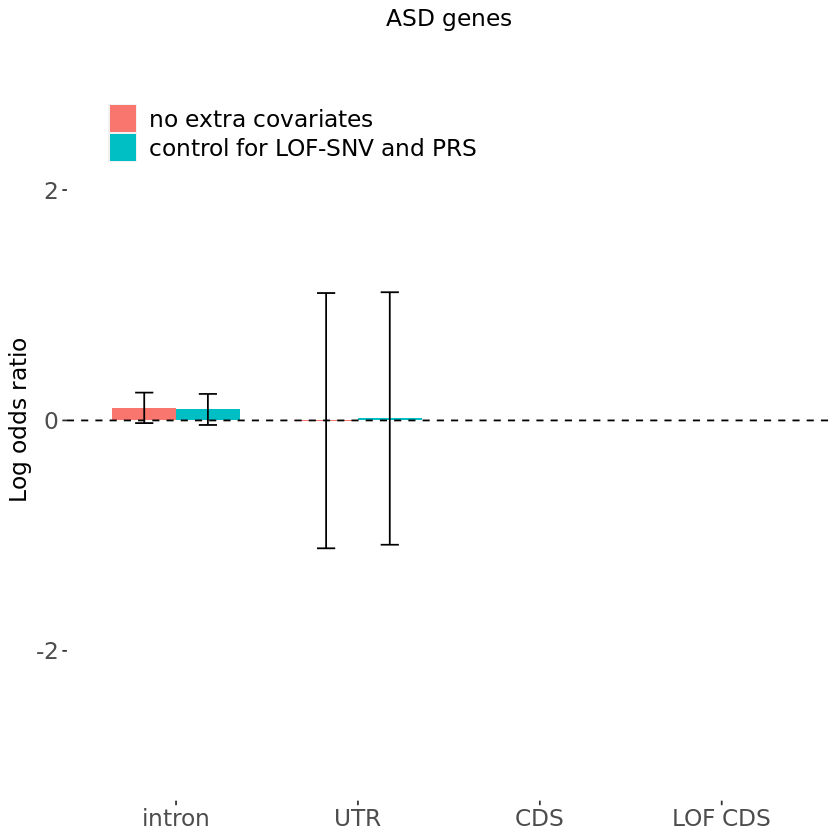

In [10]:
### SVs
#PRINT_INFO = TRUE
PRINT_INFO = FALSE

file_main = 'combined_svs_trs_snvs_prs_pc_prscs.csv'
df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
print(dim(df_main))

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (ft in fts) {
    var = paste('count_', ft, sep="")
    ###print(var)
    
    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
# + PRS_EDU_Z + PRS_SCZ_Z  + PRS_ASD_Z
# + count_dnlof_inhlof

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (ft in fts) {
    var = paste('count_', ft, sep="")
    ###print(var)
    
    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    #  + PRS_EDU_Z + PRS_SCZ_Z + PRS_ASD_Z
    # + count_dnlof_inhlof
        
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = fts, 'fts_labels' = fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)
#print(my_data)

sub_fts_labels = c('intron', 'UTR', 'CDS', 'LOF CDS')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_LOF_DEV_BR_10_cds')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_utr', 'DEV_BR_GENE_10_cds', 'LOF_DEV_BR_10_cds')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_utr', 'PLIp9_cds', 'LOF_PLIp9_cds')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_utr', 'LOWPLI_cds', 'LOF_LOWPLI_cds')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_utr', 'FDR_ASD_cds', 'LOF_FDR_ASD_cds')
title_5 = 'ASD genes'
fig_base_5 = 'FDR_ASD'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4, sub_fts_5)
title_list = list(title_1, title_2, title_3, title_4, title_5)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4, fig_base_5)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, fig_base, "_", flt, ".png")

    my_data_sub = my_data[my_data$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, log_ORs_plus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, log_ORs_minus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, ano_pval_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, sum_case_con = ifelse(comb_ncar=='log_ORs_comb', sum_case_con_comb, sum_case_con_ncar))

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print('my_data_sub.melt:')
    #print(my_data_sub.melt)

    size_txt = 14
    size_sig = 6
    ylim_min = -0.2
    ylim_max = 2.8

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.2), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(0.3, 0.9),
            legend.text = element_text(size=size_txt),
            legend.title = element_text(size=size_txt)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no extra covariates", "control for LOF-SNV and PRS"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(-3, 3))}

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 6)
}

[1]  243 1611
[1] "no extra covariates......................."
[1] "ORs:"
 [1] 2.555517 1.318763 1.411890 1.431647 1.236930 1.263659 1.101379 1.873372
 [9] 1.003530 1.128947 1.258708 1.174758 1.281096 1.094244 1.089671 1.077516
[17] 1.041038 1.009315 1.012872 1.008092 1.001345 1.063561 1.027814 1.089541
[25] 1.037687 1.018346
[1] "ORs_plus:"
 [1] 5.800579 2.314812 2.242125 2.043268 1.532878 1.552400 1.214625 3.929866
 [9] 1.657329 1.756754 1.830509 1.452014 1.593111 1.211645 1.202171 1.157984
[17] 1.091527 1.041061 1.033319 1.020683 1.003556 1.122211 1.054879 1.179274
[25] 1.078187 1.038366
[1] "ORs_minus:"
 [1] 1.1258651 0.7513075 0.8890823 1.0031062 0.9981206 1.0286229 0.9986913
 [8] 0.8930388 0.6076480 0.7254979 0.8655225 0.9504424 1.0301893 0.9882178
[15] 0.9876984 1.0026402 0.9928836 0.9785364 0.9928297 0.9956568 0.9991396
[22] 1.0079751 1.0014432 1.0066355 0.9987078 0.9987114
[1] "log_ORs:"
 [1] 0.938254687 0.276694007 0.344929340 0.358825819 0.212632804 0.234011413
 [7] 0.096562

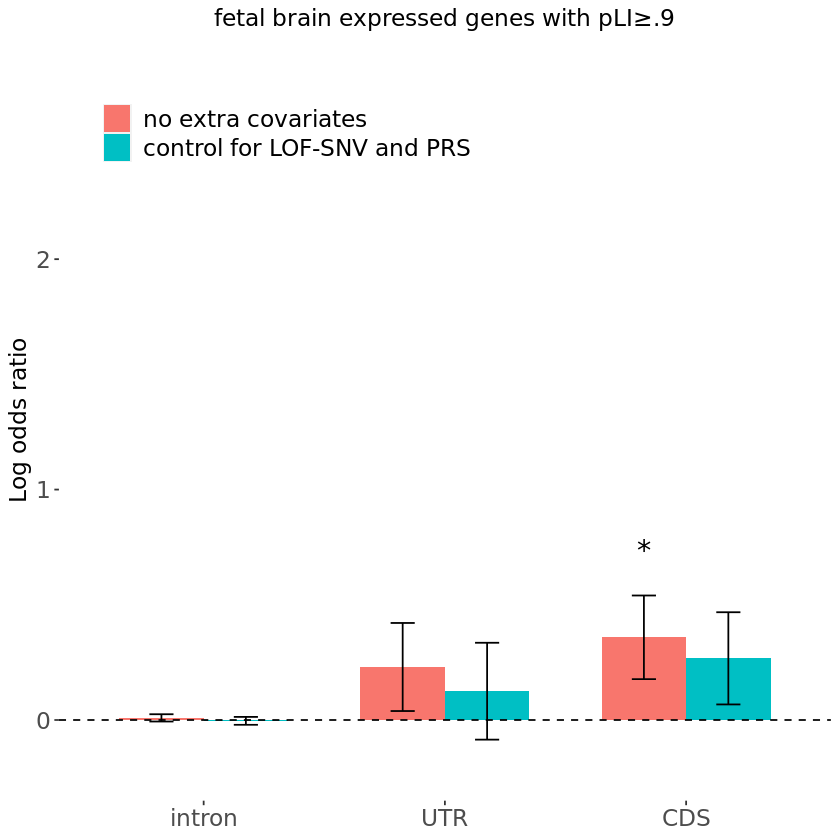

[1] "R_clogit/for_publish_v2/TRs_PLI.png"


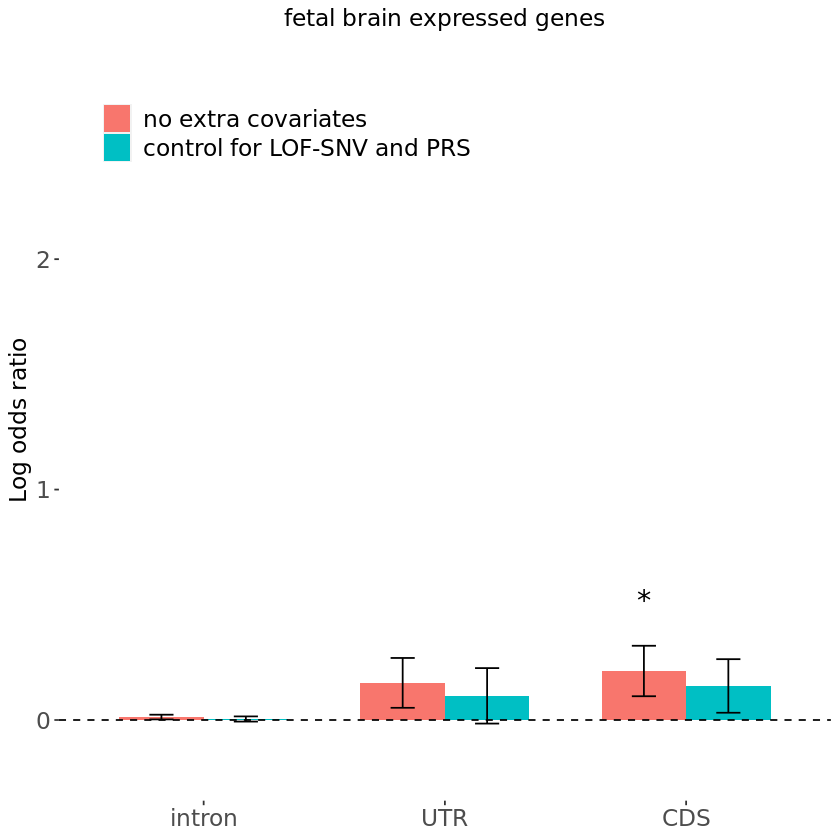

[1] "R_clogit/for_publish_v2/TRs_LOWPLI.png"


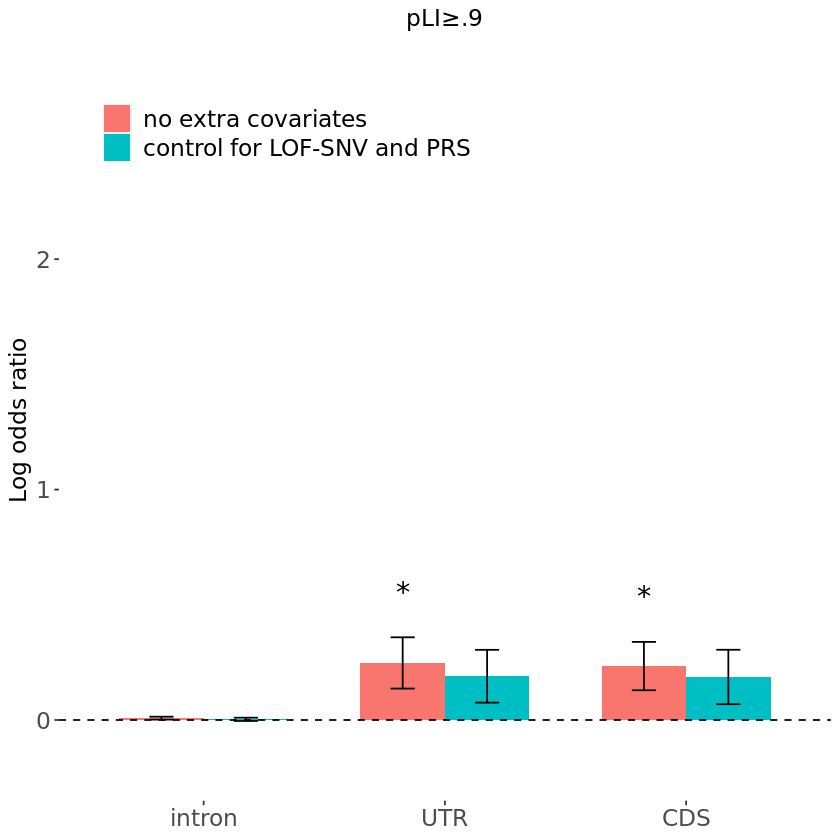

[1] "R_clogit/for_publish_v2/TRs_FDR_ASD.png"


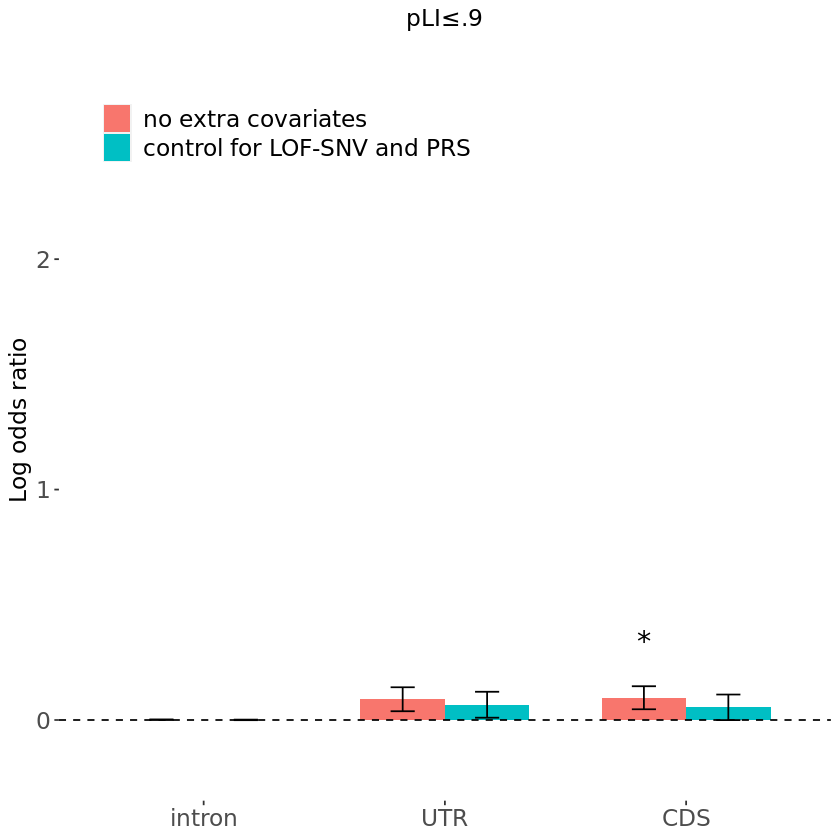

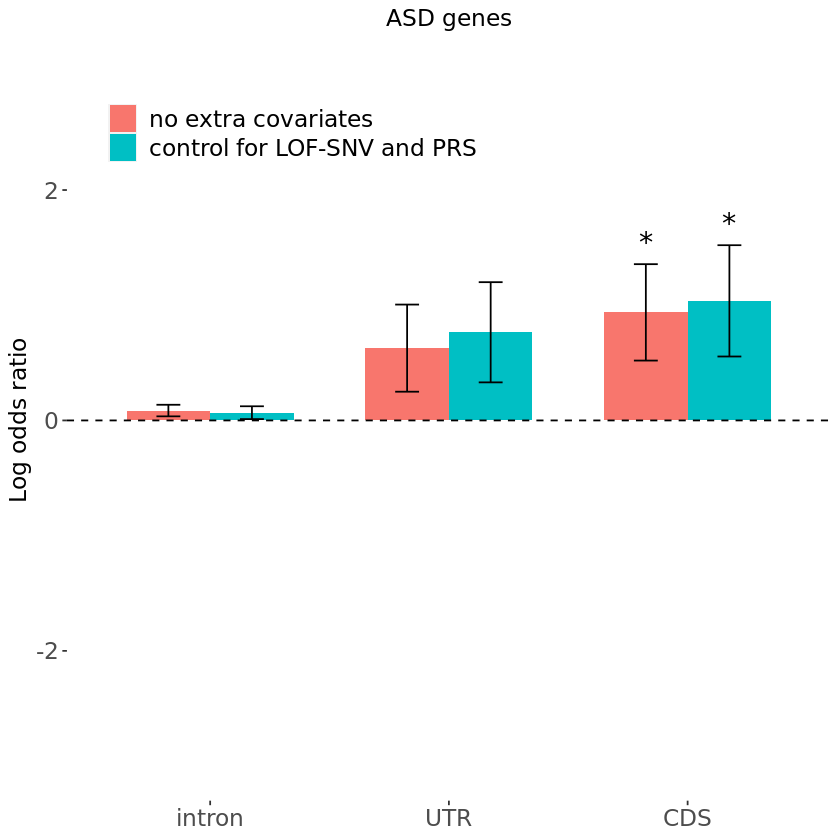

In [6]:
### TRs
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

file_main = 'combined_svs_trs_snvs_prs_pc_prscs.csv'
df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
print(dim(df_main))

zs_thr = 3
supp_thr = 2
q_suf = '_Q'

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (trs_ft in trs_fts) {
    var = paste('count_ZS', zs_thr, '_', trs_ft, '_SUPP', supp_thr, q_suf, sep="")
    ###print(var)
    
    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

### with LOF-SNV and PRS covariates...
print('with LOF-SNV and PRS covariates.......................')

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs_ncar = c()
ORs_plus_ncar = c()
ORs_minus_ncar = c()
log_ORs_ncar = c()
log_ORs_plus_ncar = c()
log_ORs_minus_ncar = c()
pvals_ncar = c()
ano_pvals_ncar = c()
sum_cases_ncar = c()
sum_controls_ncar = c()
for (trs_ft in trs_fts) {
    var = paste('count_ZS', zs_thr, '_', trs_ft, '_SUPP', supp_thr, q_suf, sep="")
    ###print(var)
    
    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases_ncar = c(sum_cases_ncar, sum_case)
    sum_controls_ncar = c(sum_controls_ncar, sum_control)
        
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs_ncar = c(ORs_ncar, OR)
    ORs_plus_ncar = c(ORs_plus_ncar, OR_plus)
    ORs_minus_ncar = c(ORs_minus_ncar, OR_minus)
    log_ORs_ncar = c(log_ORs_ncar, log_OR)
    log_ORs_plus_ncar = c(log_ORs_plus_ncar, log_OR_plus)
    log_ORs_minus_ncar = c(log_ORs_minus_ncar, log_OR_minus)
    pvals_ncar = c(pvals_ncar, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals_ncar = c(ano_pvals_ncar, ano_pval)
}

sum_case_controls_ncar = paste(as.character(sum_cases_ncar), as.character(sum_controls_ncar), sep='/')

if (PRINT_INFO) {
    print('ORs_ncar:')
    print(ORs_ncar)
    print('ORs_plus_ncar:')
    print(ORs_plus_ncar)
    print('ORs_minus_ncar:')
    print(ORs_minus_ncar)
    print('log_ORs_ncar:')
    print(log_ORs_ncar)
    print('log_ORs_plus_ncar:')
    print(log_ORs_plus_ncar)
    print('log_ORs_minus_ncar:')
    print(log_ORs_minus_ncar)
    print('pvals_ncar:')
    print(pvals_ncar)
    print('ano_pvals_ncar:')
    print(ano_pvals_ncar)
    print('sum_cases_ncar:')
    print(sum_cases_ncar)
    print('sum_controls_ncar:')
    print(sum_controls_ncar)
    print('sum_case_controls_ncar:')
    print(sum_case_controls_ncar)
}

my_data = data.frame('fts' = trs_fts, 'fts_labels' = trs_fts_labels, 
                     'log_ORs_comb' = log_ORs, 'log_ORs_plus_comb' = log_ORs_plus, 'log_ORs_minus_comb' = log_ORs_minus, 
                     'ano_pval_comb' = ano_pvals, 
                     'sum_case_con_comb' = sum_case_controls, 
                     'log_ORs_ncar' = log_ORs_ncar, 'log_ORs_plus_ncar' = log_ORs_plus_ncar, 'log_ORs_minus_ncar' = log_ORs_minus_ncar, 
                     'ano_pval_ncar' = ano_pvals_ncar, 
                     'sum_case_con_ncar' = sum_case_controls_ncar)
#print(my_data)

sub_fts_labels = c('intron', 'UTR', 'CDS')
sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_cds')
title_1 = 'fetal brain expressed genes with pLI≥.9'
fig_base_1 = 'devBrainPLI'
sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_utr', 'DEV_BR_GENE_10_cds')
title_2 = 'fetal brain expressed genes'
fig_base_2 = 'devBrain'
sub_fts_3 = c('PLIp9_intron', 'PLIp9_utr', 'PLIp9_cds')
title_3 = 'pLI≥.9'
fig_base_3 = 'PLI'
sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_utr', 'LOWPLI_cds')
title_4 = 'pLI≤.9'
fig_base_4 = 'LOWPLI'
sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_utr', 'FDR_ASD_cds')
title_5 = 'ASD genes'
fig_base_5 = 'FDR_ASD'
#sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4, sub_fts_5)
title_list = list(title_1, title_2, title_3, title_4, title_5)
fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4, fig_base_5)

for (i_plot in 1:length(sub_flts_list)) {
#for (i_plot in 1:1) {
    sub_fts = sub_flts_list[[i_plot]]
    title = title_list[[i_plot]]
    fig_base = fig_base_list[[i_plot]]
    fig_name = paste0(dir_fig, 'TRs_', fig_base, ".png")

    my_data_sub = my_data[my_data$fts %in% sub_fts,]
    my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
    #print('subset df:')
    #print(my_data_sub)

    my_data_sub.melt = melt(my_data_sub, id.vars = c('fts', 'fts_labels', 
                                                     'log_ORs_plus_comb', 'log_ORs_minus_comb', 
                                                     'ano_pval_comb', 
                                                     'sum_case_con_comb', 
                                                     'log_ORs_plus_ncar', 'log_ORs_minus_ncar', 
                                                     'ano_pval_ncar', 
                                                     'sum_case_con_ncar'), 
                            variable.name = 'comb_ncar', value.name = 'log_ORs')

    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_plus_comb, log_ORs_plus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(comb_ncar=='log_ORs_comb', log_ORs_minus_comb, log_ORs_minus_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(comb_ncar=='log_ORs_comb', ano_pval_comb, ano_pval_ncar))
    my_data_sub.melt <- transform(my_data_sub.melt, sum_case_con = ifelse(comb_ncar=='log_ORs_comb', sum_case_con_comb, sum_case_con_ncar))

    sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
    my_data_sub.melt$sig = sig

    #print('my_data_sub.melt:')
    #print(my_data_sub.melt)

    size_txt = 14
    size_sig = 6
    ylim_min = -0.2
    ylim_max = 2.8

    #geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
    #plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

    base <- ggplot(my_data_sub.melt, aes(x = fts, y = log_ORs, fill = comb_ncar, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
      geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
      geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
      geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
      geom_text(aes(label = sig, y = log_ORs_plus+0.2), position=position_dodge(width=0.7), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
      labs(y = "Log odds ratio", title = title) +
      theme(axis.text=element_text(size=size_txt),
            axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=size_txt),
            panel.background = element_blank(),
            plot.title = element_text(hjust = 0.5, size=size_txt), 
            legend.position = c(0.3, 0.9),
            legend.text = element_text(size=size_txt),
            legend.title = element_text(size=size_txt)
            ) +
      scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
      #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
      scale_fill_discrete(name = '', labels = c("no extra covariates", "control for LOF-SNV and PRS"))
      #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

    if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(-3, 3))}

    print(fig_name)
    print(base)
    ggsave(fig_name, width = 10, height = 6)
}